In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# REGRESION LINEAL MULTIPLE
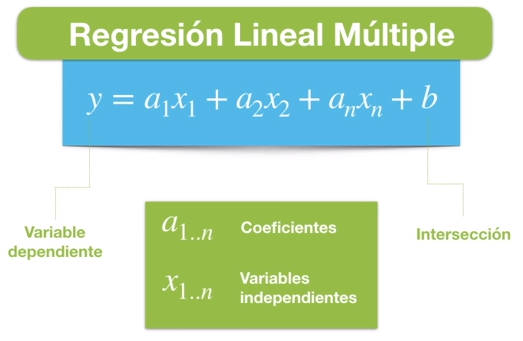
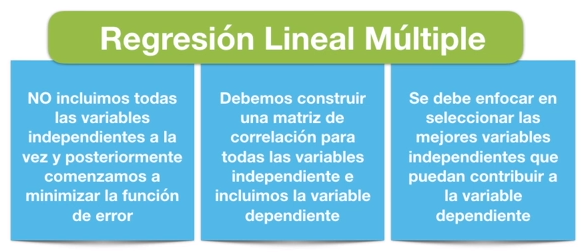

# SCIKIT LEARN

## 1.- Exploración de datos

In [22]:
boston = load_boston()

In [4]:
# Información en el dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
# Características del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Cantidad de datos que hay en el dataset
boston.data.shape

(506, 13)

In [7]:
# Información de las columnas
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 2.- Creación del modelo

In [8]:
# Seleccionamos las columnas 5, 6 y 7 del dataset: RM, AGE y DIS
X = boston.data[:, 5:8]
y = boston.target

In [9]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Definición del modelo
lr_multip = LinearRegression()
lr_multip.fit(X_train, y_train)

y_pred = lr_multip.predict(X_test)

In [11]:
print(y_test)
print(y_pred)

[24.6 18.4 20.6 19.3 29.8 22.8 11.5 22.3 32.9 19.8 19.5 33.4 44.  11.3
 13.8 23.1 23.9 15.  12.6 36.5 23.8 26.6 10.5 12.3  5.6 21.2 23.1 21.4
 13.9 25.3 14.6  9.5 14.9 24.  23.9 11.7 20.3 20.6 20.  27.  19.3 19.7
 20.5 34.9 18.7  7.  20.1 21.7  6.3 15.4 22.3 18.5 14.9 22.2 27.5 50.
 33.8 19.4 25.  24.3 25.1 17.5 30.7 11.8 24.5 22.2 19.8 24.3 50.  19.2
 16.3  8.1 10.5 14.5  5.  17.1 20.7 23.4 16.6 31.  30.1 17.8 16.7 37.
 21.9 24.1 28.4 19.6 46.  31.7 23.3 21.5 24.4 16.7 33.1 21.8 30.8 34.6
 13.4 31.6 25.  28.1]
[22.49031553 19.69210543 21.11890879 19.92041938 28.91994654 17.83779782
 13.03852823 23.4224552  33.15687505 21.90156077 16.91204296 31.90585353
 34.41716731 14.20907811  9.15802737  0.35061848 24.3860512  19.64114307
 20.20235305 28.73399602 18.68476746 32.04631961  6.92004846 14.09711446
 17.9495765  24.25359592 26.29015657 21.51863524 14.85121975 26.69789053
  9.6147493  21.47170435 21.02452514 25.10346822 26.77799944 19.98990028
 21.87611081 23.20748392 19.74529111 20.75837

Al comparar, manualmente, los datos entre y_test y y_pred, podemos determinar que el modelo no es del todo eficiente. Y podemos verificar esto con los siguientes datos.

## 3.- Datos del modelo

In [12]:
# Valor de la pendiente o coeficiente "a"
print(lr_multip.coef_)

[ 8.30200533 -0.09700645 -0.44119302]


In [13]:
# Valor de la interseccion o coeficiente "b"
print(lr_multip.intercept_)

-21.352916569434253


In [14]:
# Precisión del modelo
print(lr_multip.score(X_train, y_train))

0.5109956298074323


El valor de Score va de 0 a 1, por lo que podemos decir que la precisión del modelo no es muy buena ya que el modelo se adapta al 57,9% de los datos.

# STATSMODELS

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.datasets import spector

## 1.- Exploración de datos

In [16]:
data = spector.load()

In [17]:
# Información en el dataset
data.keys()

dict_keys(['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name', 'raw_data'])

In [18]:
data.data.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


In [19]:
# Información de las columnas
data.names

['GPA', 'TUCE', 'PSI', 'GRADE']

## 2.- Creación del modelo

In [24]:
lrm = sm.OLS(data.endog, data.exog)
res = lrm.fit()

In [25]:
pred = res.get_prediction().summary_frame(alpha=0.05)
pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.161603,0.093583,-0.029795,0.353001,-0.745268,1.068473
1,0.171899,0.103888,-0.040575,0.384373,-0.739653,1.083450
2,0.208260,0.110909,-0.018574,0.435093,-0.706746,1.123265
3,0.312653,0.181254,-0.058053,0.683359,-0.648182,1.273488
4,0.366314,0.178079,0.002101,0.730527,-0.592034,1.324663


# 3.- Datos del modelo

In [26]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  GRADE   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              9.852
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                    0.000121
Time:                        11:31:27   Log-Likelihood:                         -17.077
No. Observations:                  32   AIC:                                      40.15
Df Residuals:                      29   BIC:                                      44.55
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El valor de R2 va de 0 a 1, por lo que podemos decir que la precisión del modelo mejora comparandolo con el modelo realizado con una sola variable, pero aún así no es muy buena ya que el modelo se adapta al 50,5% de los datos.